## Step1: Downloading the MNIST database 1000 images

In [14]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import einops
from einops import rearrange, repeat
import math


from torchvision import datasets
mnist = datasets.MNIST('./data', train=True, download=True)

In [3]:
mnist = mnist._load_data()

In [4]:
(images,labels)=mnist
print(images.shape, labels.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])


In [5]:
import numpy as np
# generating 1000 random index
idx=[np.random.randint(0,len(images)) for i in range (1000)]

#(sub_images,sub_labels)=mnist([idx])
sub_labels=labels[idx]
sub_images=images[idx]


print(sub_images.shape)
print(sub_labels.shape)
#print (labels[idx])



torch.Size([1000, 28, 28])
torch.Size([1000])


#### ii. Plotting histogram of image classes in subset

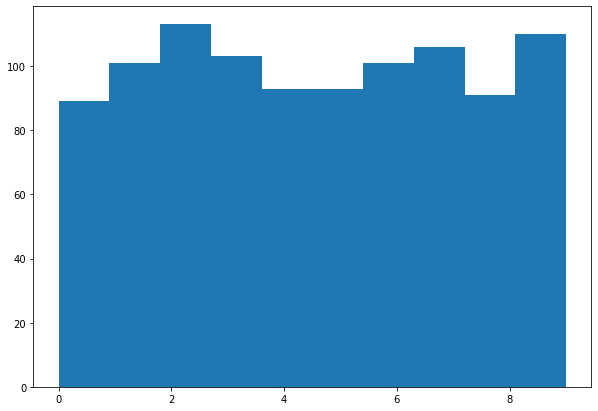

In [9]:
fig, hist_mnist=plt.subplots(figsize = (10,7))
hist_mnist.hist(sub_labels.numpy())
plt.show()

#### iii. Batch subset into minibatch

In [10]:
batch_image=rearrange(sub_images,'(batch batchsize) h w -> batch batchsize h w', batchsize=25)
print(batch_image.shape)

torch.Size([40, 25, 28, 28])


#### iv Plot 3d

tensor(4)


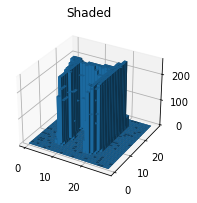

In [11]:
import torch
idx_2 = np.random.randint(0, len(sub_images))

# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')


# fake data
_x = np.arange(28)
_y = np.arange(28)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
print (sub_labels[idx_2])

top = torch.flatten(sub_images[idx_2])

bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')



plt.show()

## Problem 2 Timeseries

In [12]:
import pandas as pd
energydata=pd.read_csv('https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv')

In [68]:
energydata['datetm']= pd.to_datetime(energydata.date)
print(energydata.datetm.dtype)
energydata['week']=energydata['datetm'].dt.isocalendar().week
energydata['day']=energydata['datetm'].dt.isocalendar().day
energydata['hour']=pd.DatetimeIndex(energydata['datetm']).hour.astype(int)


datetime64[ns]


In [67]:
energydata.datetm

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: datetm, Length: 19735, dtype: datetime64[ns]

### i. Appliances consumption over weeks

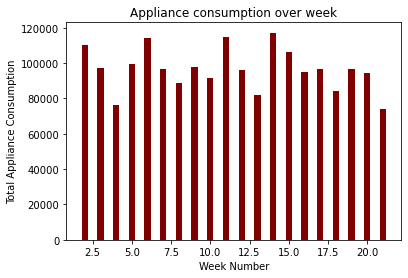

In [59]:
grpApp=energydata.groupby('week',as_index=False)['Appliances'].sum()
#grpApp.week
# creating the bar plot
plt.bar(grpApp.week, grpApp.Appliances, color ='maroon',
        width = 0.4)
 
plt.xlabel("Week Number")
plt.ylabel("Total Appliance Consumption")
plt.title("Appliance consumption over week")
plt.show()

In [90]:
#### ii. Heatmap of average hourly consumption by day of week

<AxesSubplot:xlabel='day', ylabel='hour'>

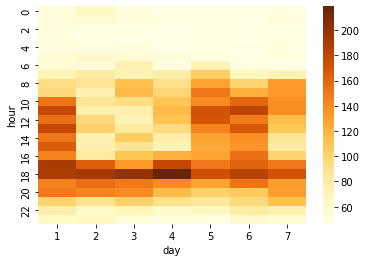

In [97]:
import seaborn as sns
grp2App=energydata.groupby(['hour','day'],as_index=False)['Appliances'].mean()
grpHMap=grp2App.pivot(index='hour',columns='day',values='Appliances')

sns.heatmap(grpHMap, annot=False, cmap="YlOrBr")


#### iii. histogram energy consumption applinaces

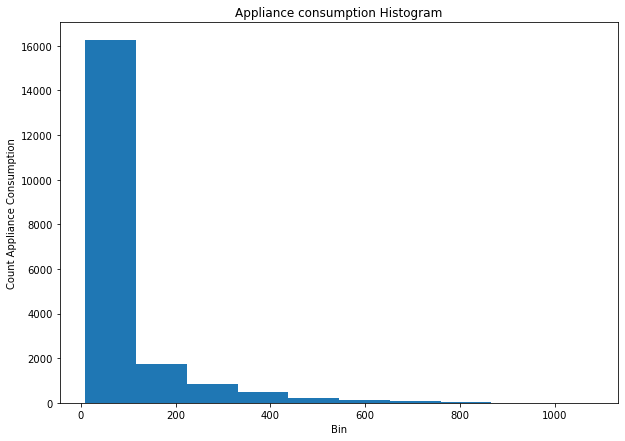

In [101]:
fig, hist_App=plt.subplots(figsize = (10,7))
hist_App.hist(energydata.Appliances)
plt.xlabel("Bin")
plt.ylabel("Count Appliance Consumption")
plt.title("Appliance consumption Histogram")
plt.show()

#### iv NSM vs Energy Consumption

In [103]:
energydata['NSM']=pd.DatetimeIndex(energydata['datetm']).hour.astype(int)*60*60+pd.DatetimeIndex(energydata['datetm']).minute.astype(int)*60+pd.DatetimeIndex(energydata['datetm']).second.astype(int)

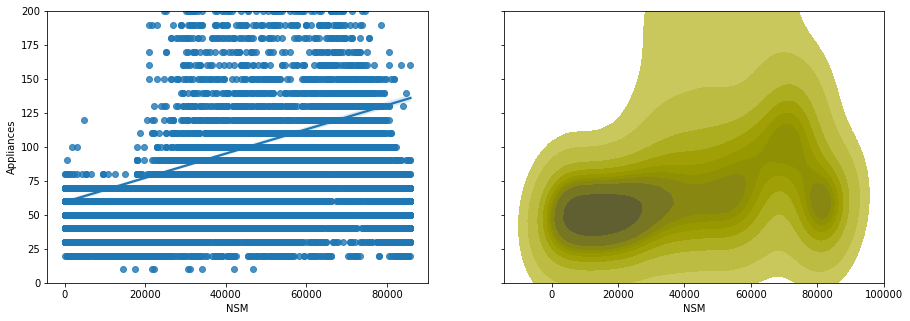

In [115]:
fig,axes=plt.subplots(1,2,figsize=(15, 5), sharey=True)
sns.regplot(ax=axes[0],x=energydata["NSM"], y=energydata["Appliances"])
sns.kdeplot(ax=axes[1],x=energydata["NSM"], y=energydata["Appliances"],color='yellow',shade=True)
plt.ylim([0,200])
plt.show()

#### v. energy consumption vs. Press mm Hg

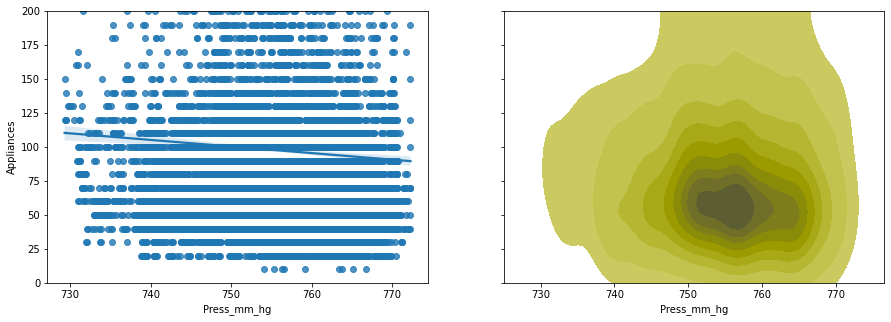

In [116]:
fig,axes=plt.subplots(1,2,figsize=(15, 5), sharey=True)
sns.regplot(ax=axes[0],x=energydata["Press_mm_hg"], y=energydata["Appliances"])
sns.kdeplot(ax=axes[1],x=energydata["Press_mm_hg"], y=energydata["Appliances"],color='yellow',shade=True)
plt.ylim([0,200])
plt.show()

#### vi Correlation with all features appliances energy

In [130]:
energydata.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,week,day,hour,NSM
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,-0.011356,0.003060,0.216792,0.217152
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,-0.186486,-0.099828,0.255346,0.254993
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.694857,0.001381,0.178858,0.178728
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,-0.100089,-0.053782,0.018594,0.018531
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.512884,0.000602,0.254784,0.254569
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.089292,-0.044249,-0.183322,-0.183182
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,0.792694,-0.017514,0.037624,0.037607
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.429332,-0.035182,-0.052392,-0.052343
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.785036,-0.091006,0.088407,0.088334
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.262366,-0.005749,-0.019068,-0.019040


Based on the correlation matrix Appliance data has highest positive correlation with NSM 
This is reasonable as the night time energy consumption will be lower. Press_mm_hg shows a 
slight negative correlation


## Problem 3

In [135]:
airfoil=pd.read_table('airfoil_self_noise.dat',sep="\s+",names=['Freq', 'Angle','Chord_Len','St_Vel','Sid_th'])


In [150]:
Stat=pd.DataFrame()
Stat['mean']=airfoil.mean()
Stat['var']=airfoil.var()
Stat['med']=airfoil.median()
Stat['kurt']=airfoil.kurt()
Stat['skew']=airfoil.skew()
Stat['Range_min']=airfoil.min()
Stat['Range_max']=airfoil.max()
Stat

,mean,var,med,kurt,skew,Range_min,Range_max
Freq,6.782302,35.024241,5.400000,-0.412951,0.689164,0.000000,22.200000
Angle,0.136548,0.008750,0.101600,-1.037964,0.457457,0.025400,0.304800
Chord_Len,50.860745,242.511614,39.600000,-1.563951,0.235852,31.700000,71.300000
St_Vel,0.011140,0.000173,0.004957,2.218903,1.702165,0.000401,0.058411
Sid_th,124.835943,47.591463,125.721000,-0.314187,-0.418952,103.380000,140.987000
